In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [1]:
from importlib import reload
import shlex
import medvqa
from medvqa.train_vqa import debug_main

In [83]:
reload(medvqa.datasets.vqa)
reload(medvqa.datasets.mimiccxr.mimiccxr_vqa_dataset_management)
reload(medvqa.datasets.iuxray.iuxray_vqa_dataset_management)
reload(medvqa.datasets.chexpert.chexpert_dataset_management)
reload(medvqa.train_vqa)

<module 'medvqa.train_vqa' from '/home/pamessina/medvqa/medvqa/train_vqa.py'>

In [2]:
output = debug_main(args=shlex.split(
    ' '.join([
        '--epochs 120',
        '--batches-per-epoch 300',
        '--batch-size 80',
        '--num-workers 5',
        '--optimizer-name "adamw"',
        '--scheduler "warmup+decay"',
        '--lr 1e-6',
        '--warmup-and-decay-args "1e-6,8,4e-4,110,5e-6"',
        '--iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220629_042239.json"',
        '--mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220629_050643.json"',
        '--classify-orientation',
        '--classify-chexpert',
        '--iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220629_055107.pkl"',
        '--mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220629_055159.pkl"',
        '--classify-questions',
        '--n-questions 97',
        '--iuxray-question-labels-filename "question_labels_per_report__20220629_052841.pkl"',
        '--mimiccxr-question-labels-filename "question_labels_per_report__20220629_052842.pkl"',
        '--balanced-split',
        '--iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123626.pkl"',
        '--mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123956.pkl"',
        '--balanced-dataloading',
        '--medical-tokenization',
        '--medical-terms-frequency-filename "medical_terms_frequency__20220629_052724.pkl"',
        '--question-encoding "one-hot"',
        '--answer-decoding "transformer"',
        '--binary-loss-name "wbce-c"',
        '--img-aug-mode "random-color-and-spatial"',
        '--chexpert-mode "vqa"',
        '--mimiccxr-include-chexpert-mode',
        '--iuxray-include-chexpert-mode',
        '--visual-input-mode "precomp-feat"',
        '--visual-features-mlp-in-dim 753',
        '--visual-features-mlp-out-dim 512',
        '--visual-features-mlp-hidden-dims 512',
        '--iuxray-precomputed-visual-features-path "/mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl"',
        '--mimiccxr-precomputed-visual-features-path "/mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl"',
        '--chexpert-precomputed-visual-features-path "/mnt/workspace/chexpert/dataset-pamessina/pyradiomics_features.pkl"',
        '--no-save',
    ])
))

script's arguments:
   epochs: 120
   batches_per_epoch: 300
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220629_042239.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220629_050643.json
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: precomp-feat
   raw_image_encoding: cnn
   image_local_feat_size: 1024
   densenet_pretrained_weights_path: 
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: 753
   visual_features_mlp_out_dim: 512
   visual_features_mlp_hidden_dims: [512]
   iuxray_precomputed_visual_features_path: /mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl
   mimiccxr_precomputed_visual_features_path: /mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl
   chexpert_precomputed_visual_features_path: /mnt/workspa

Loading images
Loading orientations
Loading genders
Loading chexpert labels
Loading precomputed visual features from /mnt/workspace/chexpert/dataset-pamessina/pyradiomics_features.pkl ...
features.shape = (223648, 753), len(image_paths) = 223648
  done!
label = 1, len(pos_indices)=23309, len(neg_indices)=200321
label = 2, len(pos_indices)=35151, len(neg_indices)=188479
label = 3, len(pos_indices)=10675, len(neg_indices)=212955
label = 4, len(pos_indices)=111301, len(neg_indices)=112329
label = 5, len(pos_indices)=65274, len(neg_indices)=158356
label = 6, len(pos_indices)=42556, len(neg_indices)=181074
label = 7, len(pos_indices)=24815, len(neg_indices)=198815
label = 8, len(pos_indices)=67191, len(neg_indices)=156439
label = 9, len(pos_indices)=22601, len(neg_indices)=201029
label = 10, len(pos_indices)=97875, len(neg_indices)=125755
label = 11, len(pos_indices)=6174, len(neg_indices)=217456
label = 12, len(pos_indices)=9680, len(neg_indices)=213950
label = 13, len(pos_indices)=117184,

In [3]:
output.keys()

dict_keys(['mimiccxr_vqa_trainer', 'iuxray_vqa_trainer', 'chexpert_vqa_trainer'])

In [15]:
!python ../train_vqa.py \
        --epochs 120 \
        --batches-per-epoch 300 \
        --batch-size 150 \
        --num-workers 5 \
        --optimizer-name "adamw" \
        --scheduler "warmup+decay" \
        --lr 1e-6 \
        --warmup-and-decay-args "1e-6,8,4e-4,110,5e-6" \
        --iuxray-qa-adapted-reports-filename "qa_adapted_reports__20220629_042239.json" \
        --mimiccxr-qa-adapted-reports-filename "qa_adapted_reports__20220629_050643.json" \
        --classify-orientation \
        --classify-chexpert \
        --iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220629_055107.pkl" \
        --mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220629_055159.pkl" \
        --classify-questions \
        --n-questions 97 \
        --iuxray-question-labels-filename "question_labels_per_report__20220629_052841.pkl" \
        --mimiccxr-question-labels-filename "question_labels_per_report__20220629_052842.pkl" \
        --balanced-split \
        --iuxray-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123626.pkl" \
        --mimiccxr-balanced-metadata-filename "balanced_dataloading_metadata__20220629_123956.pkl" \
        --balanced-dataloading \
        --medical-tokenization \
        --medical-terms-frequency-filename "medical_terms_frequency__20220629_052724.pkl" \
        --question-encoding "one-hot" \
        --answer-decoding "transformer" \
        --binary-loss-name "wbce-c" \
        --img-aug-mode "random-color-and-spatial" \
        --chexpert-mode "vqa" \
        --mimiccxr-include-chexpert-mode \
        --iuxray-include-chexpert-mode \
        --visual-input-mode "precomp-feat" \
        --visual-features-mlp-in-dim 753 \
        --visual-features-mlp-out-dim 512 \
        --visual-features-mlp-hidden-dims 512 \
        --iuxray-precomputed-visual-features-path "/mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl" \
        --mimiccxr-precomputed-visual-features-path "/mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl" \
        --chexpert-precomputed-visual-features-path "/mnt/workspace/chexpert/dataset-pamessina/pyradiomics_features.pkl" \
        --save

script's arguments:
   epochs: 120
   batches_per_epoch: 300
   checkpoint_folder: None
   iuxray_qa_adapted_reports_filename: qa_adapted_reports__20220629_042239.json
   mimiccxr_qa_adapted_reports_filename: qa_adapted_reports__20220629_050643.json
   vocab_min_freq: 5
   embed_size: 256
   question_encoding: one-hot
   answer_decoding: transformer
   question_hidden_size: 128
   answer_hidden_size: 256
   visual_input_mode: precomp-feat
   raw_image_encoding: cnn
   image_local_feat_size: 1024
   densenet_pretrained_weights_path: 
   freeze_image_encoder: False
   imagenet_pretrained: False
   visual_features_mlp_in_dim: 753
   visual_features_mlp_out_dim: 512
   visual_features_mlp_hidden_dims: [512]
   iuxray_precomputed_visual_features_path: /mnt/workspace/iu-x-ray/dataset-pamessina/pyradiomics_features.pkl
   mimiccxr_precomputed_visual_features_path: /mnt/workspace/mimic-cxr-jpg/dataset-pamessina/pyradiomics_features.pkl
   chexpert_precomputed_visual_features_path: /mnt/workspa

label = 13, onehot=110 len(pos_indices)=201, len(neg_indices)=3436
len(self.train_dataset__chexpert_mode) = 1000000000000000000
Generating balanced validation dataset in chexpert mode ...
n = 147
label = 1, onehot=98 len(pos_indices)=25, len(neg_indices)=30
label = 2, onehot=99 len(pos_indices)=30, len(neg_indices)=30
label = 3, onehot=100 len(pos_indices)=19, len(neg_indices)=30
label = 4, onehot=101 len(pos_indices)=30, len(neg_indices)=30
label = 5, onehot=102 len(pos_indices)=13, len(neg_indices)=30
label = 6, onehot=103 len(pos_indices)=0, len(neg_indices)=30
label = 7, onehot=104 len(pos_indices)=13, len(neg_indices)=30
label = 8, onehot=105 len(pos_indices)=23, len(neg_indices)=30
label = 9, onehot=106 len(pos_indices)=8, len(neg_indices)=30
label = 10, onehot=107 len(pos_indices)=20, len(neg_indices)=30
label = 11, onehot=108 len(pos_indices)=7, len(neg_indices)=30
label = 12, onehot=109 len(pos_indices)=10, len(neg_indices)=30
label = 13, onehot=110 len(pos_indices)=12, len(ne

---- Epoch 9/120
(1) Training stage (lr = 0.000400) ...
loss 4.78749, a_loss 2.23167, cD 1.07250, wmdcmp 0.14770, orien_loss 0.06319, oracc 0.97662, chx_loss 0.86747, chxlmicf1 0.42992, chxlmacf1 0.36026, chxlacc 0.68915, chxlrocaucmic 0.72103, chxlrocaucmac 0.64536, ql_loss 0.57821, qlmacf1 0.14272, qlmicf1 0.40254, gloss 0.60956, gacc 0.68194, ema 0.51333, 55.32 secs
(2) Validation stage ...
cD 1.28982, wmdcmp 0.17688, oracc 0.97450, chxlmicf1 0.43830, chxlmacf1 0.35435, chxlacc 0.69645, chxlrocaucmic 0.70836, chxlrocaucmac 0.64500, qlmacf1 0.15319, qlmicf1 0.39705, ema 0.43927, 18.51 secs
Adjusting learning rate of group 0 to 3.8438e-04.
---- Epoch 10/120
(1) Training stage (lr = 0.000384) ...
loss 1.85093, a_loss 2.05696, cD 1.19575, wmdcmp 0.16221, orien_loss 0.06356, oracc 0.98155, chx_loss 1.08053, chxlmicf1 0.44221, chxlmacf1 0.36566, chxlacc 0.69222, chxlrocaucmic 0.72685, chxlrocaucmac 0.65513, ql_loss 0.57539, qlmacf1 0.14709, qlmicf1 0.40982, gloss 0.56506, gacc 0.71061, em

cD 1.32901, wmdcmp 0.18237, oracc 0.98629, chxlmicf1 0.45116, chxlmacf1 0.37831, chxlacc 0.69836, chxlrocaucmic 0.72155, chxlrocaucmac 0.66108, qlmacf1 0.16800, qlmicf1 0.40662, ema 0.58182, 18.51 secs
Adjusting learning rate of group 0 to 2.3831e-04.
---- Epoch 22/120
(1) Training stage (lr = 0.000238) ...
loss 3.89002, a_loss 1.72653, cD 1.52653, wmdcmp 0.20103, orien_loss 0.01340, oracc 0.98844, chx_loss 0.87195, chxlmicf1 0.47475, chxlmacf1 0.39373, chxlacc 0.70104, chxlrocaucmic 0.74594, chxlrocaucmac 0.68465, ql_loss 0.55909, qlmacf1 0.16941, qlmicf1 0.43183, gloss 0.50562, gacc 0.74903, ema 0.56037, 56.40 secs
(2) Validation stage ...
cD 1.30497, wmdcmp 0.17880, oracc 0.98629, chxlmicf1 0.44916, chxlmacf1 0.37760, chxlacc 0.69420, chxlrocaucmic 0.72134, chxlrocaucmac 0.66443, qlmacf1 0.16317, qlmicf1 0.38506, ema 0.61891, 18.53 secs
Adjusting learning rate of group 0 to 2.2901e-04.
---- Epoch 23/120
(1) Training stage (lr = 0.000229) ...
loss 1.64589, a_loss 1.71379, cD 1.54400,

cD 1.37219, wmdcmp 0.18637, oracc 0.98941, chxlmicf1 0.46570, chxlmacf1 0.38910, chxlacc 0.70400, chxlrocaucmic 0.73069, chxlrocaucmac 0.67233, qlmacf1 0.16726, qlmicf1 0.41094, ema 0.58036, 18.50 secs
Adjusting learning rate of group 0 to 1.4198e-04.
---- Epoch 35/120
(1) Training stage (lr = 0.000142) ...
loss 1.63743, a_loss 1.63813, cD 1.61011, wmdcmp 0.21095, orien_loss 0.06666, oracc 0.99108, chx_loss 0.92735, chxlmicf1 0.48320, chxlmacf1 0.40558, chxlacc 0.70717, chxlrocaucmic 0.75559, chxlrocaucmac 0.69974, ql_loss 0.55089, qlmacf1 0.18420, qlmicf1 0.44285, gloss 0.47189, gacc 0.77823, ema 0.58412, 55.48 secs
(2) Validation stage ...
cD 1.35207, wmdcmp 0.18423, oracc 0.98845, chxlmicf1 0.45705, chxlmacf1 0.38708, chxlacc 0.70495, chxlrocaucmic 0.72801, chxlrocaucmac 0.66927, qlmacf1 0.16869, qlmicf1 0.40694, ema 0.58691, 18.39 secs
Adjusting learning rate of group 0 to 1.3644e-04.
---- Epoch 36/120
(1) Training stage (lr = 0.000136) ...
loss 3.89944, a_loss 1.64337, cD 1.62508,

cD 1.37646, wmdcmp 0.18658, oracc 0.99086, chxlmicf1 0.47331, chxlmacf1 0.39837, chxlacc 0.70438, chxlrocaucmic 0.73379, chxlrocaucmac 0.68074, qlmacf1 0.17325, qlmicf1 0.41300, ema 0.59855, 18.44 secs
Adjusting learning rate of group 0 to 8.4592e-05.
---- Epoch 48/120
(1) Training stage (lr = 0.000085) ...
loss 3.80127, a_loss 1.60535, cD 1.67610, wmdcmp 0.21789, orien_loss 0.01942, oracc 0.99295, chx_loss 0.87172, chxlmicf1 0.48755, chxlmacf1 0.41361, chxlacc 0.70928, chxlrocaucmic 0.76107, chxlrocaucmac 0.70893, ql_loss 0.54422, qlmacf1 0.19277, qlmicf1 0.45407, gloss 0.45569, gacc 0.78514, ema 0.59738, 56.07 secs
(2) Validation stage ...
cD 1.32182, wmdcmp 0.18020, oracc 0.99435, chxlmicf1 0.46539, chxlmacf1 0.39048, chxlacc 0.70198, chxlrocaucmic 0.73289, chxlrocaucmac 0.67334, qlmacf1 0.16698, qlmicf1 0.39162, ema 0.58400, 18.66 secs
Adjusting learning rate of group 0 to 8.1288e-05.
---- Epoch 49/120
(1) Training stage (lr = 0.000081) ...
loss 3.69830, a_loss 1.59869, cD 1.67450,

(2) Validation stage ...
cD 1.34815, wmdcmp 0.18434, oracc 0.99278, chxlmicf1 0.47229, chxlmacf1 0.39139, chxlacc 0.70307, chxlrocaucmic 0.73199, chxlrocaucmac 0.67403, qlmacf1 0.17173, qlmicf1 0.40451, ema 0.56873, 18.68 secs
Adjusting learning rate of group 0 to 5.0398e-05.
---- Epoch 61/120
(1) Training stage (lr = 0.000050) ...
loss 3.71955, a_loss 1.58687, cD 1.70113, wmdcmp 0.22056, orien_loss 0.07964, oracc 0.99315, chx_loss 0.82071, chxlmicf1 0.49352, chxlmacf1 0.41978, chxlacc 0.71123, chxlrocaucmic 0.76533, chxlrocaucmac 0.71555, ql_loss 0.54326, qlmacf1 0.19753, qlmicf1 0.45558, gloss 0.44932, gacc 0.78939, ema 0.60442, 56.39 secs
(2) Validation stage ...
cD 1.39381, wmdcmp 0.18915, oracc 0.99134, chxlmicf1 0.46857, chxlmacf1 0.39284, chxlacc 0.70176, chxlrocaucmic 0.73167, chxlrocaucmac 0.67487, qlmacf1 0.16987, qlmicf1 0.40732, ema 0.57745, 18.50 secs
Adjusting learning rate of group 0 to 4.8430e-05.
---- Epoch 62/120
(1) Training stage (lr = 0.000048) ...
loss 1.45748, a_

cD 1.39622, wmdcmp 0.18884, oracc 0.99278, chxlmicf1 0.45692, chxlmacf1 0.38589, chxlacc 0.70786, chxlrocaucmic 0.72868, chxlrocaucmac 0.67075, qlmacf1 0.17176, qlmicf1 0.41020, ema 0.58691, 18.83 secs
Adjusting learning rate of group 0 to 3.0027e-05.
---- Epoch 74/120
(1) Training stage (lr = 0.000030) ...
loss 3.54339, a_loss 1.56293, cD 1.72859, wmdcmp 0.22416, orien_loss 0.00469, oracc 0.99412, chx_loss 0.83445, chxlmicf1 0.49836, chxlmacf1 0.42786, chxlacc 0.71586, chxlrocaucmic 0.76962, chxlrocaucmac 0.72289, ql_loss 0.53988, qlmacf1 0.20758, qlmicf1 0.45861, gloss 0.43641, gacc 0.79792, ema 0.61533, 56.70 secs
(2) Validation stage ...
cD 1.37970, wmdcmp 0.18687, oracc 0.99278, chxlmicf1 0.47924, chxlmacf1 0.39811, chxlacc 0.70626, chxlrocaucmic 0.73224, chxlrocaucmac 0.67345, qlmacf1 0.17304, qlmicf1 0.41500, ema 0.59127, 18.81 secs
Adjusting learning rate of group 0 to 2.8854e-05.
---- Epoch 75/120
(1) Training stage (lr = 0.000029) ...
loss 3.63550, a_loss 1.56535, cD 1.72849,

cD 1.37895, wmdcmp 0.18685, oracc 0.99278, chxlmicf1 0.47908, chxlmacf1 0.39925, chxlacc 0.70678, chxlrocaucmic 0.73393, chxlrocaucmac 0.67705, qlmacf1 0.17175, qlmicf1 0.41437, ema 0.59636, 18.59 secs
Adjusting learning rate of group 0 to 1.7889e-05.
---- Epoch 87/120
(1) Training stage (lr = 0.000018) ...
loss 1.59181, a_loss 1.54841, cD 1.74051, wmdcmp 0.22568, orien_loss 0.01059, oracc 0.99459, chx_loss 0.95383, chxlmicf1 0.49852, chxlmacf1 0.42728, chxlacc 0.71572, chxlrocaucmic 0.77080, chxlrocaucmac 0.72433, ql_loss 0.53892, qlmacf1 0.20221, qlmicf1 0.45817, gloss 0.42720, gacc 0.80531, ema 0.61993, 56.01 secs
(2) Validation stage ...
cD 1.38756, wmdcmp 0.18814, oracc 0.99134, chxlmicf1 0.46875, chxlmacf1 0.39363, chxlacc 0.70166, chxlrocaucmic 0.73146, chxlrocaucmac 0.67186, qlmacf1 0.17152, qlmicf1 0.40811, ema 0.58982, 18.55 secs
Adjusting learning rate of group 0 to 1.7191e-05.
---- Epoch 88/120
(1) Training stage (lr = 0.000017) ...
loss 3.56639, a_loss 1.56741, cD 1.74244,

cD 1.40381, wmdcmp 0.19030, oracc 0.99134, chxlmicf1 0.46966, chxlmacf1 0.39411, chxlacc 0.70358, chxlrocaucmic 0.73320, chxlrocaucmac 0.67507, qlmacf1 0.17184, qlmicf1 0.41088, ema 0.58909, 18.48 secs
Adjusting learning rate of group 0 to 1.0658e-05.
---- Epoch 100/120
(1) Training stage (lr = 0.000011) ...
loss 3.72557, a_loss 1.56121, cD 1.74571, wmdcmp 0.22638, orien_loss 0.00410, oracc 0.99392, chx_loss 0.88640, chxlmicf1 0.49833, chxlmacf1 0.42966, chxlacc 0.71540, chxlrocaucmic 0.77131, chxlrocaucmac 0.72672, ql_loss 0.53919, qlmacf1 0.20427, qlmicf1 0.45845, gloss 0.43203, gacc 0.79444, ema 0.62091, 56.20 secs
(2) Validation stage ...
cD 1.39246, wmdcmp 0.18879, oracc 0.99278, chxlmicf1 0.46139, chxlmacf1 0.38926, chxlacc 0.70144, chxlrocaucmic 0.73142, chxlrocaucmac 0.67516, qlmacf1 0.17344, qlmicf1 0.41049, ema 0.60291, 18.52 secs
Adjusting learning rate of group 0 to 1.0242e-05.
---- Epoch 101/120
(1) Training stage (lr = 0.000010) ...
loss 3.59854, a_loss 1.55894, cD 1.7446

cD 1.38530, wmdcmp 0.18802, oracc 0.99278, chxlmicf1 0.47085, chxlmacf1 0.39614, chxlacc 0.70326, chxlrocaucmic 0.73238, chxlrocaucmac 0.67661, qlmacf1 0.17580, qlmicf1 0.41712, ema 0.59564, 18.65 secs
Adjusting learning rate of group 0 to 6.3500e-06.
---- Epoch 113/120
(1) Training stage (lr = 0.000006) ...
loss 3.66251, a_loss 1.54330, cD 1.76427, wmdcmp 0.22806, orien_loss 0.00612, oracc 0.99479, chx_loss 0.88609, chxlmicf1 0.49958, chxlmacf1 0.42978, chxlacc 0.71641, chxlrocaucmic 0.77210, chxlrocaucmac 0.72698, ql_loss 0.53913, qlmacf1 0.20979, qlmicf1 0.46036, gloss 0.42061, gacc 0.80681, ema 0.62127, 55.69 secs
(2) Validation stage ...
cD 1.39808, wmdcmp 0.18940, oracc 0.99278, chxlmicf1 0.46500, chxlmacf1 0.39236, chxlacc 0.70497, chxlrocaucmic 0.73213, chxlrocaucmac 0.67540, qlmacf1 0.17241, qlmicf1 0.41556, ema 0.59345, 18.46 secs
Adjusting learning rate of group 0 to 6.1020e-06.
---- Epoch 114/120
(1) Training stage (lr = 0.000006) ...
loss 1.52290, a_loss 1.54967, cD 1.7389

### Training-Validation plots

In [14]:
from medvqa.evaluation.plots import plot_train_val_curves
from medvqa.utils.constants import MetricNames

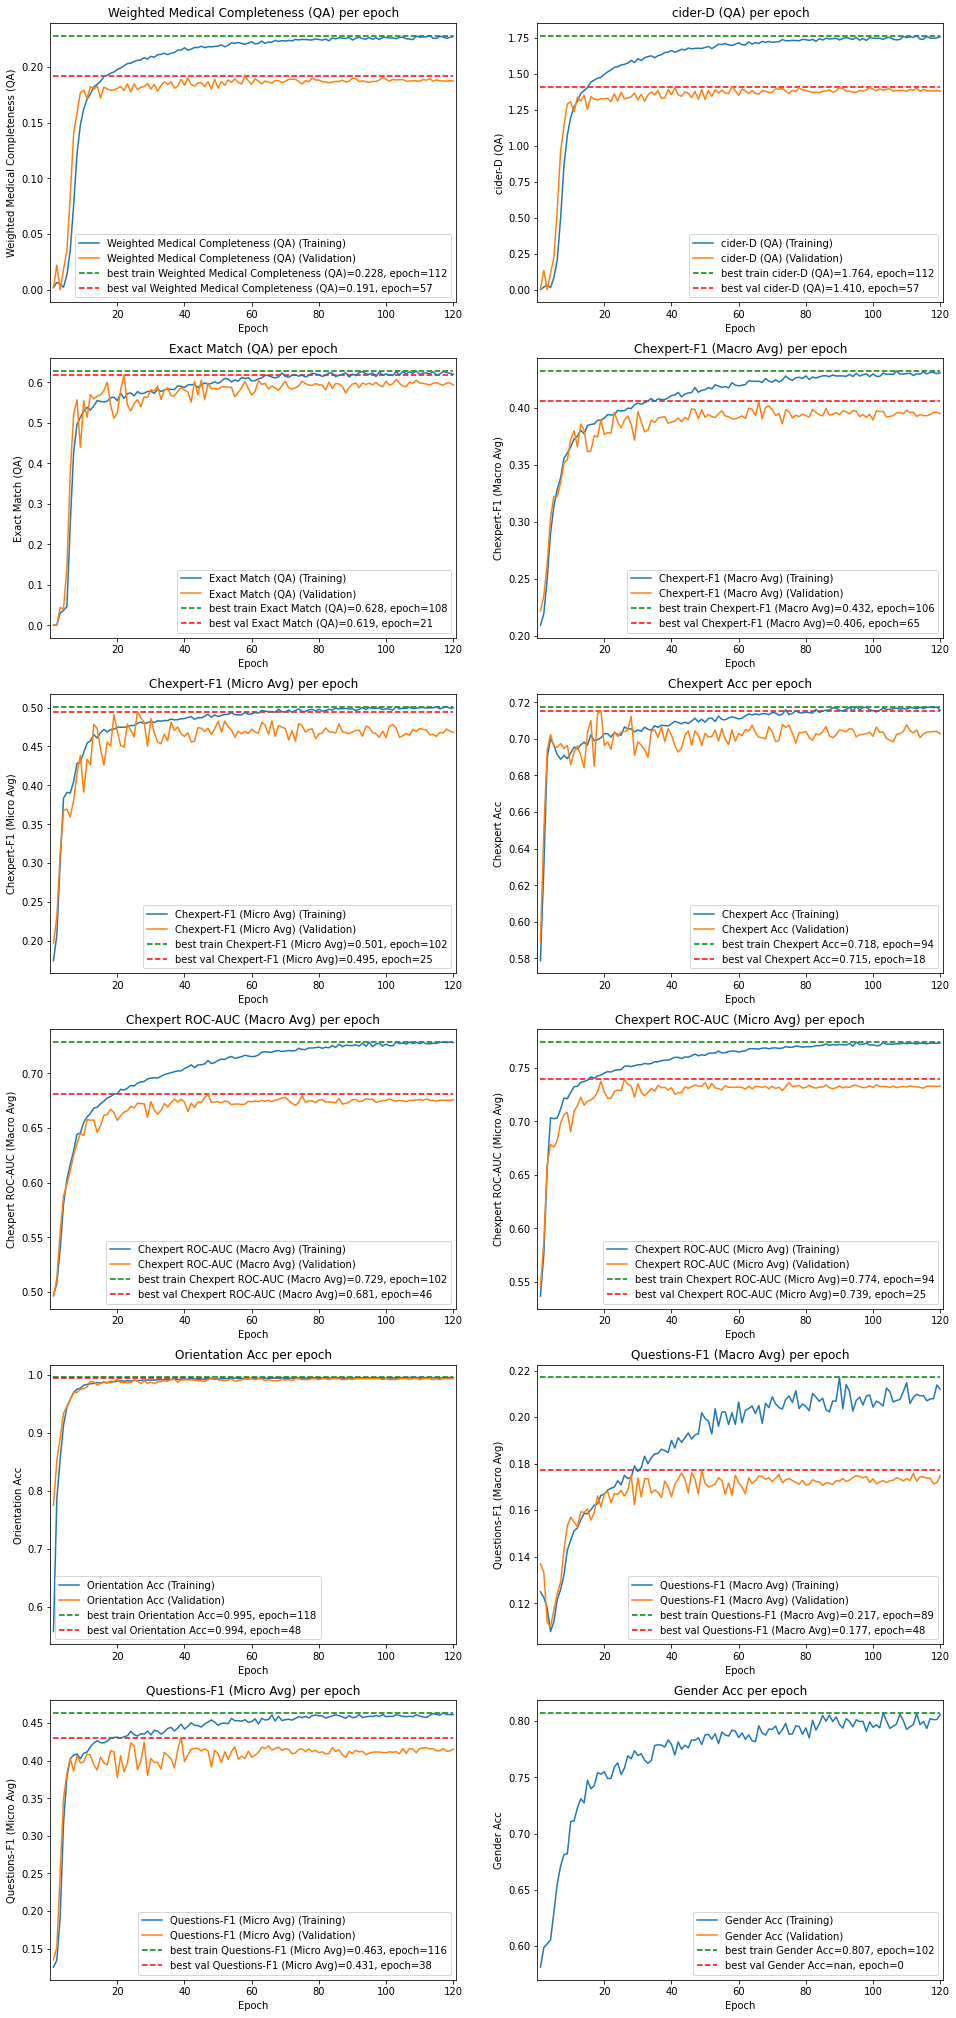

In [16]:
plot_train_val_curves('/home/pamessina/medvqa-workspace/models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/metrics_logs.csv',
                 [MetricNames.WMEDCOMP, MetricNames.CIDER_D, MetricNames.EXACTMATCH_ANSWER,
                  MetricNames.CHXLABELMACROAVGF1, MetricNames.CHXLABELMICROAVGF1,
                  MetricNames.CHXLABELACC,
                  MetricNames.CHXLABEL_ROCAUC_MACRO, MetricNames.CHXLABEL_ROCAUC_MICRO,
                  MetricNames.ORIENACC,
                  MetricNames.QLABELS_MACROAVGF1, MetricNames.QLABELS_MICROAVGF1,
                  MetricNames.GENDER_ACC,
                 ],
                 ['Weighted Medical Completeness (QA)', 'cider-D (QA)', 'Exact Match (QA)',
                  'Chexpert-F1 (Macro Avg)', 'Chexpert-F1 (Micro Avg)',
                  'Chexpert Acc',
                  'Chexpert ROC-AUC (Macro Avg)', 'Chexpert ROC-AUC (Micro Avg)',
                  'Orientation Acc',
                  'Questions-F1 (Macro Avg)', 'Questions-F1 (Micro Avg)',
                  'Gender Acc',
                 ],
                 single_plot_figsize=(8,6))

# Test Set Evaluation


# Report-level Results

In [7]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql" \
        --eval-mode "ground-truth" \
        --no-iuxray \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql
   eval_mode: ground-truth
   n_questions_per_report: None
   qclass_threshold: 0
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/metadata.json
1) device = cuda
2) Loading iuxray and mimiccxr QA adapted reports ...
3) Initializing tokenizer ...
Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports__20220629_042239.json;qa_adapted_reports__20220629_050643.json).pkl ...
4) Estimating ma

Generating LALR tables
Generating LALR tables
Generating LALR tables
	**** process 4 finished, elapsed time = 185.2419717311859
	**** process 5 finished, elapsed time = 185.24210953712463
	**** process 6 finished, elapsed time = 185.24218606948853
	**** process 7 finished, elapsed time = 185.24224829673767
	**** process 8 finished, elapsed time = 185.24231219291687
	**** process 9 finished, elapsed time = 185.2423734664917
	**** process 10 finished, elapsed time = 185.24243569374084
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(dense121(img)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl


In [5]:
!python ../eval_report_generation.py \
        --checkpoint-folder "models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql" \
        --eval-mode "chexpert-labels" \
        --no-iuxray \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql
   eval_mode: chexpert-labels
   n_questions_per_report: None
   qclass_threshold: 0
   batch_size: 160
   device: GPU
   num_workers: 0
   answer_decoding: greedy-search
   eval_checkpoint_folder: None
   eval_iuxray: False
   eval_mimiccxr: True
   use_amp: False
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/metadata.json
1) device = cuda
2) Loading iuxray and mimiccxr QA adapted reports ...
3) Initializing tokenizer ...
Loading /home/pamessina/medvqa-workspace/cache/vocab__min_freq=5__from(qa_adapted_reports__20220629_042239.json;qa_adapted_reports__20220629_050643.json).pkl ...
4) Estimating maximum ans

	**** process 6 finished, elapsed time = 37.38932013511658
Generating LALR tables
Generating LALR tables
	**** process 7 finished, elapsed time = 38.74288201332092
Generating LALR tables
	**** process 8 finished, elapsed time = 39.977766036987305
Generating LALR tables
	**** process 9 finished, elapsed time = 40.85909342765808
	**** process 10 finished, elapsed time = 40.859188079833984
Report-level metrics successfully saved to /home/pamessina/medvqa-workspace/results/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl


In [7]:
from medvqa.evaluation.report_generation import get_report_level_metrics_dataframe

### MIMIC-CXR metrics

In [11]:
df = get_report_level_metrics_dataframe([
    '/home/pamessina/medvqa-workspace/results/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=ground-truth).pkl',
    '/home/pamessina/medvqa-workspace/results/vqa/20220803_083657_mim+mim(chex)+iu+iu(chex)+chexp(vqa)_oevqa(mlp(vf)+onehot+transf)_cnn-pretr=0_dws=0.73,0.15,0.07,0.03,0.2_medtok_orien_chx_ql/mimiccxr_report_level_metrics(eval_mode=chexpert-labels).pkl',
])

In [12]:
df[df.columns[:20]]

,metrics_path,b1,b2,b3,b4,cD,rg-L,met,mdcmp,wmdcmp,chxlabf1(hard),p(micro),r(micro),f1(micro),p(macro),r(macro),f1(macro),acc,p(NF),p(EC)
0,/home/pamessina/medvqa-workspace/results/vqa/2...,0.302301,0.175237,0.097644,0.052421,0.173888,0.259261,0.223429,0.171257,0.152679,0.597029,0.621283,0.682835,0.650607,0.547045,0.573555,0.523294,0.820868,0.422414,0.455154
1,/home/pamessina/medvqa-workspace/results/vqa/2...,0.300609,0.168313,0.093550,0.047573,0.040714,0.197792,0.188035,0.083368,0.063049,0.403129,0.313043,0.800542,0.450085,0.322161,0.737476,0.376847,0.525418,0.555556,0.272411
